In [2]:
#Basiclally we do Data Augmentation to address the problem of overfitting in CNN 
#like the images may be rotated or darker 
#we basically create new images by zooming,rotating,change in contrast etc

In [3]:
!pip install opencv-python
!pip install pillow


In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [5]:
#Loading flowers dataset in folder named flower_photos

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [7]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [11]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

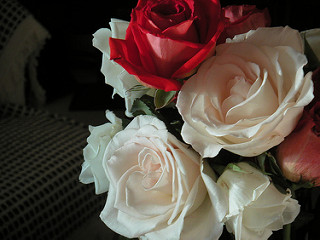

In [12]:
PIL.Image.open(str(roses[1]))

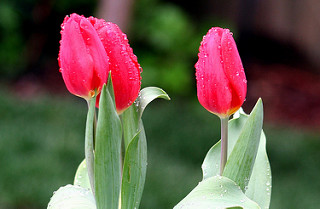

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [17]:
#We need string form of path since it cannot be accessed in above format

In [18]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(240, 179, 3)

In [21]:
#all images should be of same size 
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
#train-test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
#scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)         

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.3212 - loss: 1.5494
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.6062 - loss: 0.9950
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.7174 - loss: 0.7697
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7974 - loss: 0.5457
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9097 - loss: 0.2893
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9313 - loss: 0.2074
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9763 - loss: 0.1017
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9866 - loss: 0.0506
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9862 - loss: 0.0661
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9792 - loss: 0.0705
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9925 - loss: 0.0440
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6111 - loss: 2.6189


[2.568035364151001, 0.6230936646461487]

In [29]:
#Here we see that while train accuracy is very high (99%), 
#the test accuracy is significantly low (66.99%) indicating overfitting.
#Let's make some predictions before we use data augmentation to address overfitting

In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


array([[ 11.474898  ,  17.849241  ,  -1.7836484 , -11.331198  ,
         -7.717576  ],
       [  9.363625  ,   5.341631  ,  -6.5584626 ,  -6.211939  ,
          3.2444377 ],
       [ -2.8040755 ,   8.689336  ,  16.951254  , -14.05306   ,
         -2.6183796 ],
       ...,
       [ -0.84474385,  -2.2498775 ,  -3.0943706 ,   3.0002184 ,
          5.331076  ],
       [  3.9837894 ,  -4.41884   ,   1.1743063 ,  -0.44012946,
          3.046485  ],
       [  5.0537105 , -16.484774  ,   1.9354566 ,  10.206288  ,
          3.3846576 ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

In [34]:
#Improve Test Accuracy Using Data Augmentation

In [36]:
# Define image dimensions (replace with your actual values)
img_height = 224
img_width = 224
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# Adjusting RandomZoom to reduce augmentation extent
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.05),  # Reduce zoom factor
  ]
)


C:\Users\K KIRAN KUMAR\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


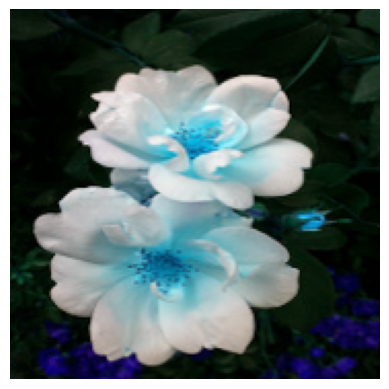

In [37]:
plt.axis('off')
plt.imshow(X[0])

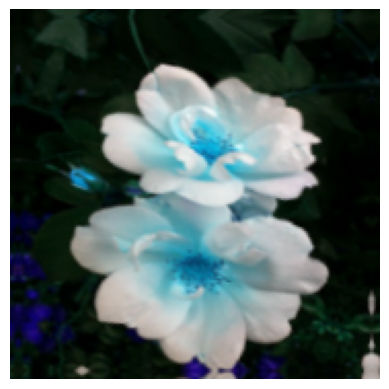

In [38]:
#Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Assuming X_train_scaled and y_train are your training data
# Define image dimensions
img_height = 224
img_width = 224
num_classes = 10  # Example number of classes

# Create data augmentation sequence
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.Resizing(img_height, img_width)  # Resize images to (224, 224)
    ]
)

# Define your model
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Assuming X_train_scaled and y_train are your training data
batch_size = 32
epochs = 30
model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 180, 180, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(32, 180, 180, 3), dtype=float32, sparse=None, name=keras_tensor_36>',)
  • kwargs={'mask': 'None'}

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
#You can see that by using data augmentation and drop out layer
#the accuracy of test set predictions is increased to 73.74%